In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
def create_dataset():
    df = pd.read_csv('datasets/iris.data', header=None)

    X = df.drop(labels=4, axis=1)
    Y = df[4]

    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    dummy_y = to_categorical(encoded_Y)

    X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)
    
    return df, X_train, X_test, y_train, y_test

In [3]:
df, X_train, X_test, y_train, y_test = create_dataset()

df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
type(create_dataset()[1])

pandas.core.frame.DataFrame

In [5]:
def create_error_report(dataset=create_dataset(), input_c: int = 4, output_c: int = 3, loss: str = 'categorical_crossentropy', metrics: str = 'accuracy', optimizer: str = 'adam', epochs: int = 75, batch_size: int = 10, validation_split: float = 0.1):
    X_train_in = dataset[1]
    y_train_in = dataset[3]
    
    model = Sequential()
    model.add(Dense(input_c, activation='relu'))
    model.add(Dense(output_c, activation='softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

    history = model.fit(X_train_in, y_train_in, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    history_df = pd.DataFrame(history.history)

    fig, axes = plt.subplots(1, 2, figsize=(15,7))

    sns.lineplot(data=history_df[f'val_{metrics}'], ax=axes[0])
    axes[0].set_title(metrics)
    
    sns.lineplot(data=history_df['val_loss'], ax=axes[1])
    axes[1].set_title('Loss')
    
    model.evaluate(X_test, y_test)

    
    return history_df
    

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3775 - loss: 1.4900 - val_accuracy: 0.4167 - val_loss: 1.3915
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3246 - loss: 1.4261 - val_accuracy: 0.4167 - val_loss: 1.2690
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3728 - loss: 1.2527 - val_accuracy: 0.4167 - val_loss: 1.1731
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3496 - loss: 1.1680 - val_accuracy: 0.5000 - val_loss: 1.1008
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2758 - loss: 1.2207 - val_accuracy: 0.5000 - val_loss: 1.0489
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4256 - loss: 1.0678 - val_accuracy: 0.5000 - val_loss: 1.0101
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5194 - loss: 1.0044 - val_accuracy: 0.5000 - val_loss: 0.9798
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5400 - loss: 0.9555 - val_accuracy: 0.5000 - val_los

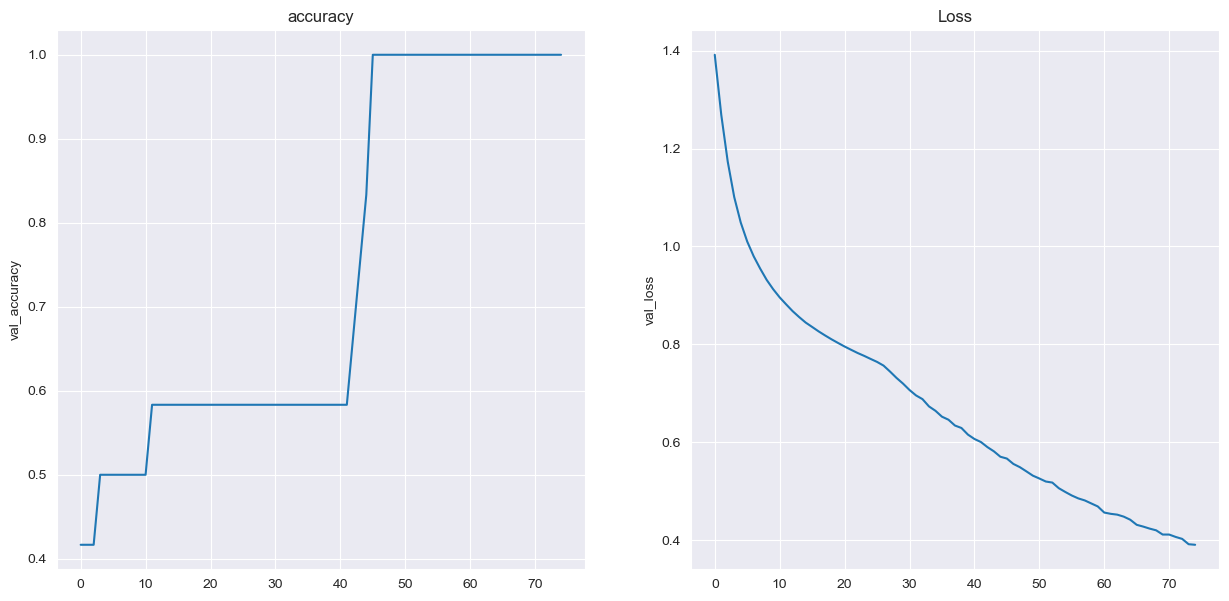

In [6]:
history_df = create_error_report()


In [7]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.314815,1.577073,0.416667,1.391456
1,0.314815,1.431212,0.416667,1.269002
2,0.314815,1.302115,0.416667,1.173141
3,0.314815,1.198347,0.500000,1.100826
4,0.333333,1.124454,0.500000,1.048942
...,...,...,...,...
70,0.935185,0.525229,1.000000,0.411733
71,0.944444,0.518875,1.000000,0.406880
72,0.944444,0.514647,1.000000,0.402909
73,0.935185,0.512759,1.000000,0.391993


Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3312 - loss: 2.8963 - val_accuracy: 0.1667 - val_loss: 2.9969
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3261 - loss: 2.6889 - val_accuracy: 0.1667 - val_loss: 2.7235
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3168 - loss: 2.4262 - val_accuracy: 0.1667 - val_loss: 2.4734
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3059 - loss: 2.0103 - val_accuracy: 0.1667 - val_loss: 2.2531
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3275 - loss: 2.0636 - val_accuracy: 0.1667 - val_loss: 2.0550
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4171 - loss: 1.7225 - val_accuracy: 0.1667 - val_loss: 1.8831
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3197 - loss: 1.6996 - val_accuracy: 0.0000e+00 - val_loss: 1.7314
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 1.6334 - val_accuracy: 0.0000e

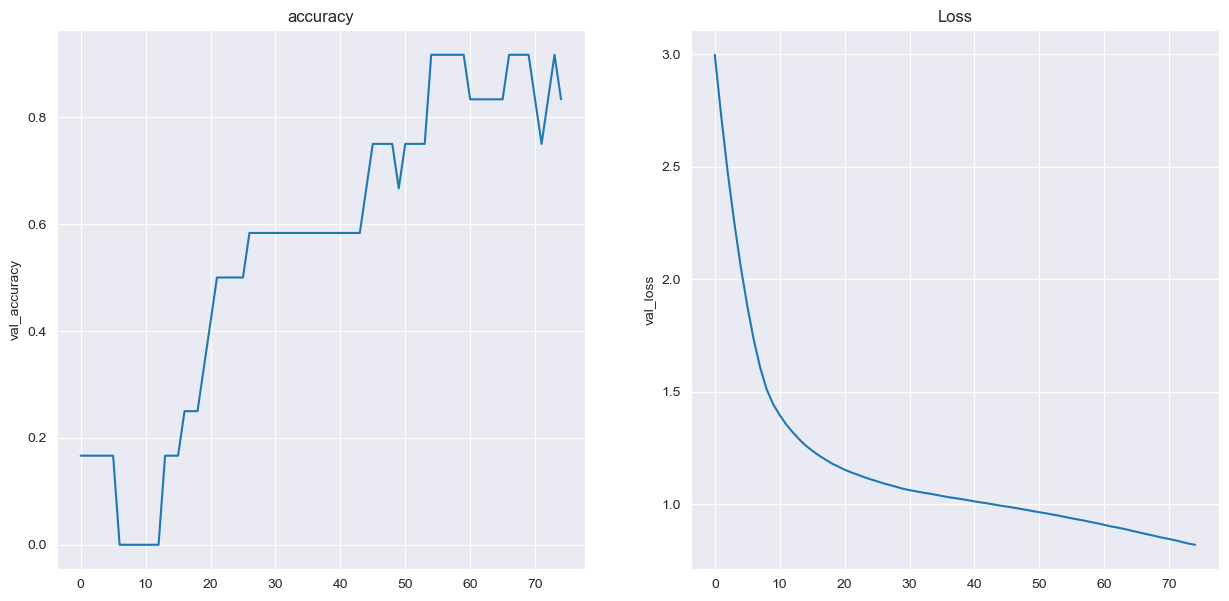

In [8]:
history_df = create_error_report(input_c=7)

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.3878 - loss: 1.3442 - val_AUC: 0.2066 - val_loss: 1.3575
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.4197 - loss: 1.2072 - val_AUC: 0.3281 - val_loss: 1.2847
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.4860 - loss: 1.1748 - val_AUC: 0.4236 - val_loss: 1.2360
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.6910 - loss: 1.0245 - val_AUC: 0.4566 - val_loss: 1.1946
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.5972 - loss: 1.0836 - val_AUC: 0.5399 - val_loss: 1.1416
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7038 - loss: 0.9919 - val_AUC: 0.5781 - val_loss: 1.1062
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7330 - loss: 0.9566 - val_AUC: 0.6562 - val_loss: 1.0508
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8075 - loss: 0.8682 - val_AUC: 0.6753 - val_loss: 1.0151
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7806 - loss:

,AUC,loss,val_AUC,val_loss
0,0.407279,1.296181,0.206597,1.357519
1,0.460005,1.185777,0.328125,1.284671
2,0.539137,1.133927,0.423611,1.235994
3,0.608196,1.083498,0.456597,1.194595
4,0.656722,1.036746,0.539931,1.141608
...,...,...,...,...
70,0.990291,0.311700,0.996528,0.384088
71,0.991684,0.306044,0.996528,0.370962
72,0.992756,0.304276,0.996528,0.363606
73,0.992134,0.298368,0.996528,0.356876


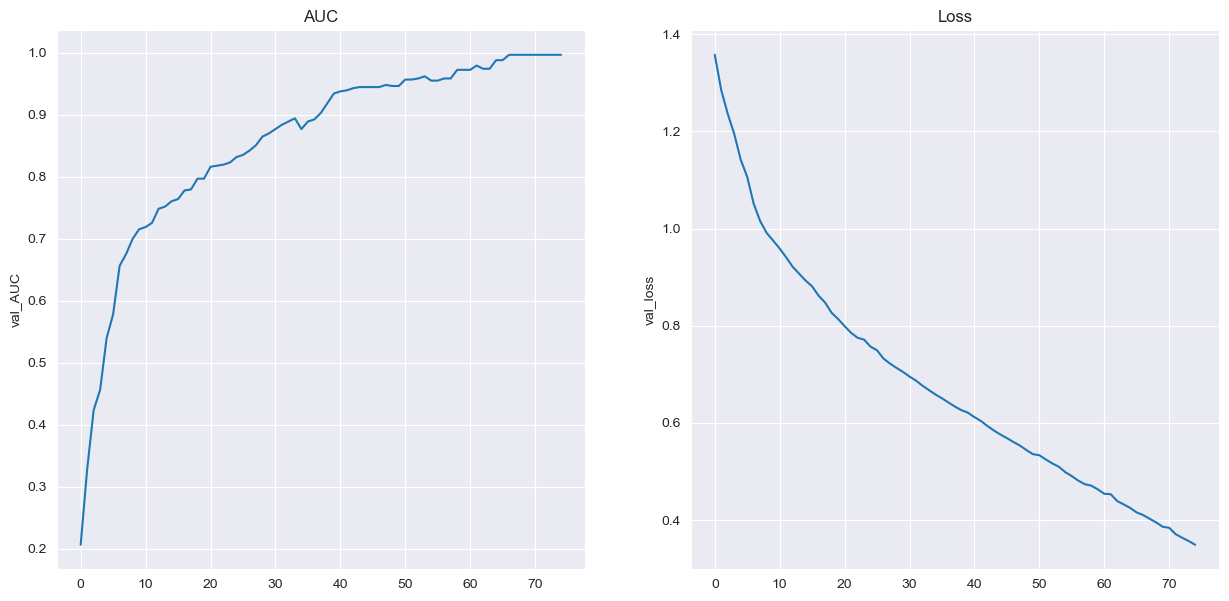

In [9]:
create_error_report(input_c=7, optimizer='RMSprop', metrics='AUC')

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - AUC: 0.6032 - loss: 1.0860 - val_AUC: 0.8472 - val_loss: 0.8403
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7311 - loss: 0.9476 - val_AUC: 0.8698 - val_loss: 0.8229
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7666 - loss: 0.9144 - val_AUC: 0.8941 - val_loss: 0.8074
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8017 - loss: 0.9089 - val_AUC: 0.9115 - val_loss: 0.7938
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8157 - loss: 0.8835 - val_AUC: 0.9306 - val_loss: 0.7826
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8497 - loss: 0.8951 - val_AUC: 0.8785 - val_loss: 0.7783
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8223 - loss: 0.8685 - val_AUC: 0.9149 - val_loss: 0.7605
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8490 - loss: 0.8360 - val_AUC: 0.9410 - val_loss: 0.7461
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8500 - loss:

,AUC,loss,val_AUC,val_loss
0,0.671939,0.990130,0.847222,0.840327
1,0.741448,0.931940,0.869792,0.822872
2,0.782279,0.914304,0.894097,0.807354
3,0.804441,0.897799,0.911458,0.793788
4,0.806863,0.886590,0.930556,0.782576
...,...,...,...,...
70,0.992713,0.316875,1.000000,0.298436
71,0.993999,0.316038,1.000000,0.286366
72,0.990998,0.310581,1.000000,0.282297
73,0.987419,0.310339,1.000000,0.312985


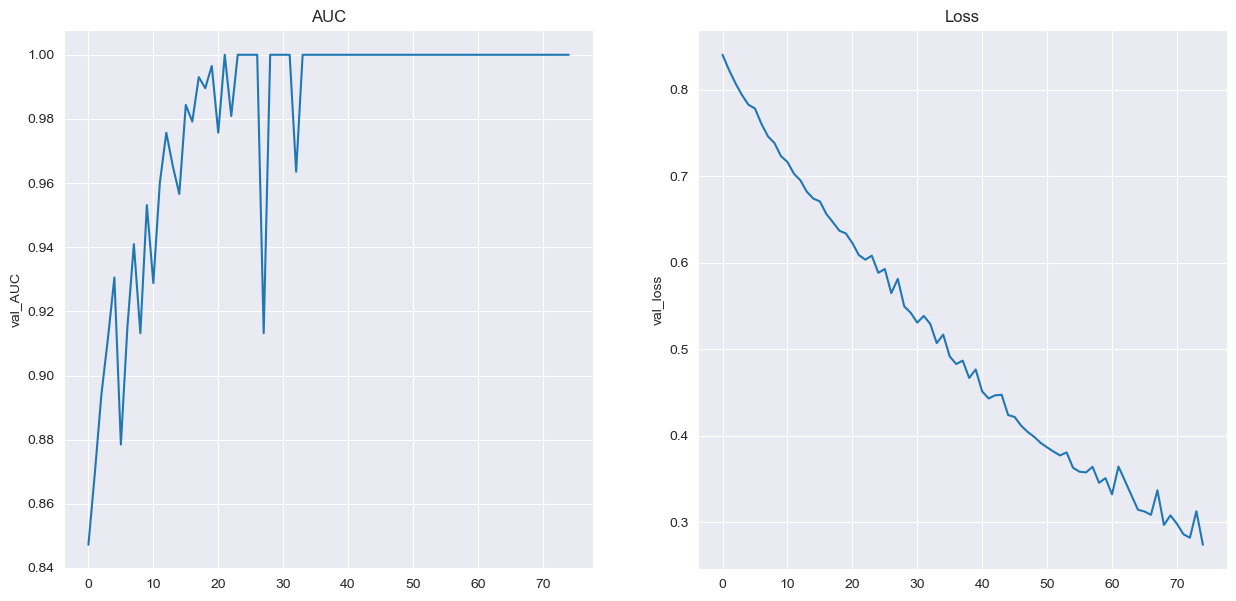

In [10]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC')

Epoch 1/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - AUC: 0.5167 - loss: 1.6764 - val_AUC: 0.6111 - val_loss: 1.0687
Epoch 2/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5265 - loss: 1.3033 - val_AUC: 0.6250 - val_loss: 1.0254
Epoch 3/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5373 - loss: 1.2341 - val_AUC: 0.5990 - val_loss: 1.0077
Epoch 4/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6095 - loss: 1.0877 - val_AUC: 0.6476 - val_loss: 0.9999
Epoch 5/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6304 - loss: 1.0775 - val_AUC: 0.7587 - val_loss: 0.9681
Epoch 6/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6490 - loss: 1.0596 - val_AUC: 0.8108 - val_loss: 0.9352
Epoch 7/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6824 - loss: 1.0311 - val_AUC: 0.8212 - val_loss: 0.9301
Epoch 8/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6651 - loss: 1.0336 - val_AUC: 0.8698 - val_loss: 0.9293
Epoch 9/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.7256 - loss: 1.0052 - v

,AUC,loss,val_AUC,val_loss
0,0.544474,1.512829,0.611111,1.068689
1,0.533072,1.301974,0.625000,1.025399
2,0.543896,1.203293,0.598958,1.007727
3,0.561621,1.144015,0.647569,0.999940
4,0.607660,1.099339,0.758681,0.968106
...,...,...,...,...
70,0.996528,0.449601,1.000000,0.461534
71,0.995156,0.442442,1.000000,0.454960
72,0.996528,0.432878,1.000000,0.443586
73,0.995199,0.426593,1.000000,0.438130


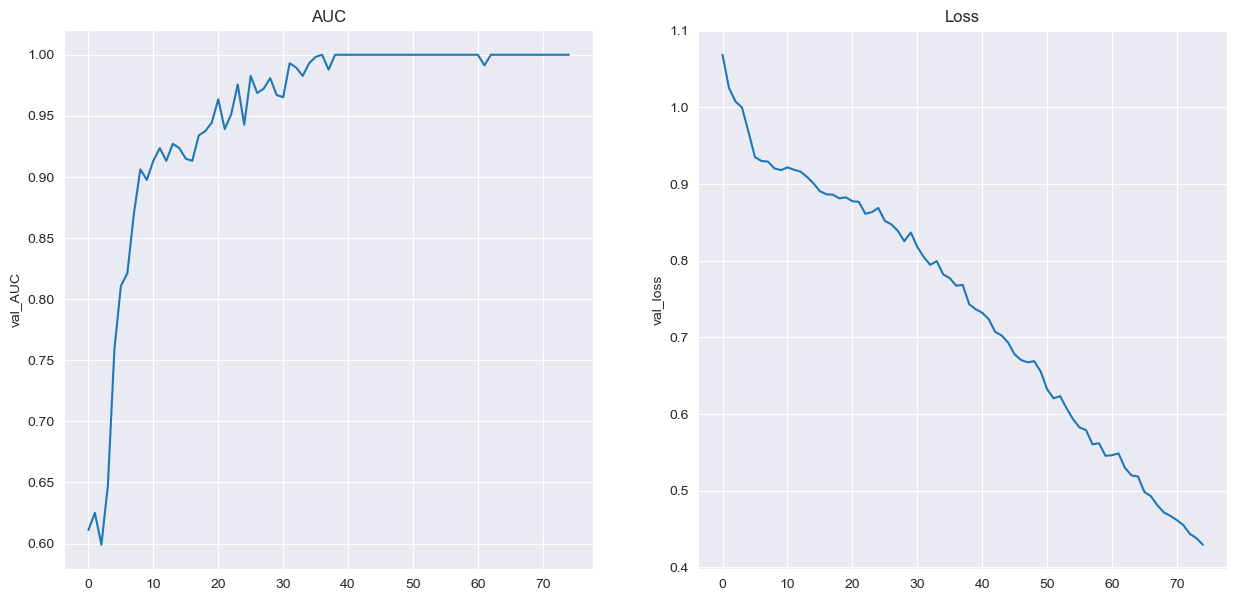

In [11]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=20)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - AUC: 0.3313 - loss: 3.7862 - val_AUC: 0.3524 - val_loss: 3.2829
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - AUC: 0.4196 - loss: 2.4603 - val_AUC: 0.4219 - val_loss: 2.2483
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - AUC: 0.4481 - loss: 1.7853 - val_AUC: 0.4792 - val_loss: 1.7694
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - AUC: 0.5147 - loss: 1.5075 - val_AUC: 0.5226 - val_loss: 1.4507
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - AUC: 0.6400 - loss: 1.2142 - val_AUC: 0.5260 - val_loss: 1.2170
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - AUC: 0.6944 - loss: 0.9999 - val_AUC: 0.5851 - val_loss: 1.0469
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - AUC: 0.7251 - loss: 0.9075 - val_AUC: 0.6424 - val_loss: 0.9477
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - AUC: 0.7975 - loss: 0.8317 - val_AUC: 0.6910 - val_loss: 0.9289
Epoch 9/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - AUC: 0.8135 - loss: 0.8230 -

,AUC,loss,val_AUC,val_loss
0,0.346129,3.641813,0.352431,3.282906
1,0.407493,2.495352,0.421875,2.248302
2,0.443351,1.800899,0.479167,1.769391
3,0.536908,1.450169,0.522569,1.450742
4,0.640968,1.204265,0.526042,1.216965
...,...,...,...,...
70,0.967400,0.678576,0.961806,0.804331
71,0.970851,0.676633,0.960069,0.802035
72,0.967785,0.675459,0.970486,0.801826
73,0.971643,0.673537,0.970486,0.799702


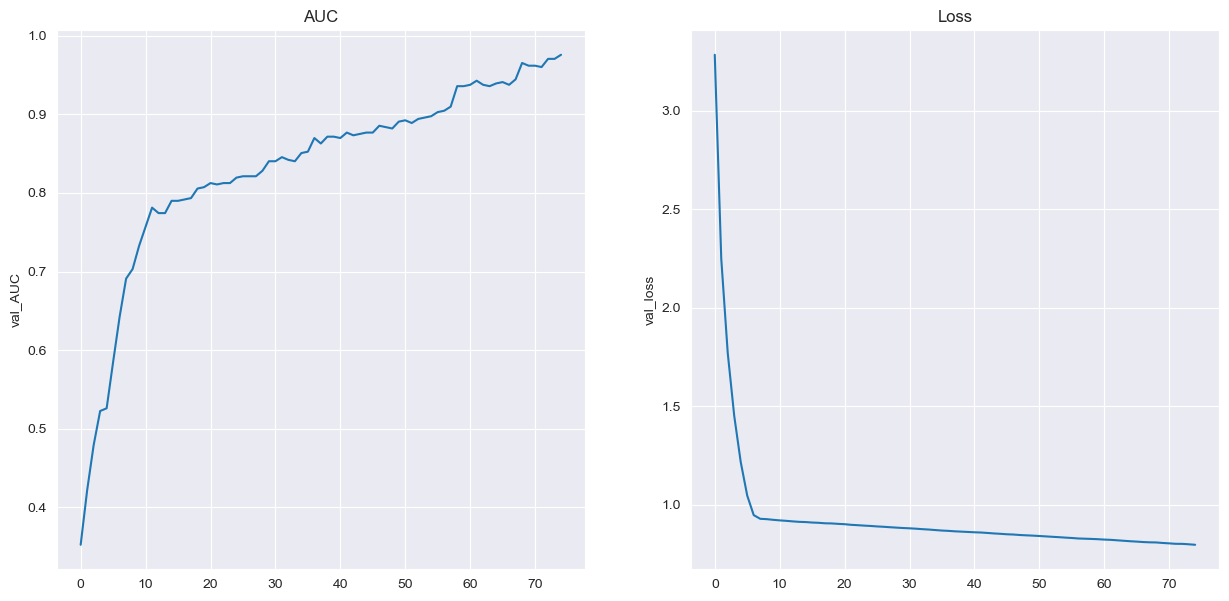

In [12]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=65)

Epoch 1/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - AUC: 0.7003 - loss: 1.0172 - val_AUC: 0.7569 - val_loss: 0.9615
Epoch 2/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8506 - loss: 0.8862 - val_AUC: 0.8264 - val_loss: 0.8556
Epoch 3/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8697 - loss: 0.7622 - val_AUC: 0.8385 - val_loss: 0.7774
Epoch 4/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8899 - loss: 0.6983 - val_AUC: 0.9132 - val_loss: 0.7261
Epoch 5/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9162 - loss: 0.6287 - val_AUC: 0.9722 - val_loss: 0.6735
Epoch 6/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9053 - loss: 0.6295 - val_AUC: 0.9757 - val_loss: 0.6513
Epoch 7/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9351 - loss: 0.5531 - val_AUC: 1.0000 - val_loss: 0.6216
Epoch 8/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9426 - loss: 0.5366 - val_AUC: 0.9132 - val_loss: 0.5868
Epoch 9/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9610 - loss:

,AUC,loss,val_AUC,val_loss
0,0.729274,0.989743,0.756944,0.961466
1,0.866405,0.851477,0.826389,0.855619
2,0.877722,0.756696,0.838542,0.777432
3,0.896455,0.684965,0.913194,0.726084
4,0.906679,0.632903,0.972222,0.673476
...,...,...,...,...
70,0.995842,0.156410,1.000000,0.101692
71,0.995413,0.155123,1.000000,0.106222
72,0.996506,0.148952,1.000000,0.095938
73,0.997428,0.136984,1.000000,0.117190


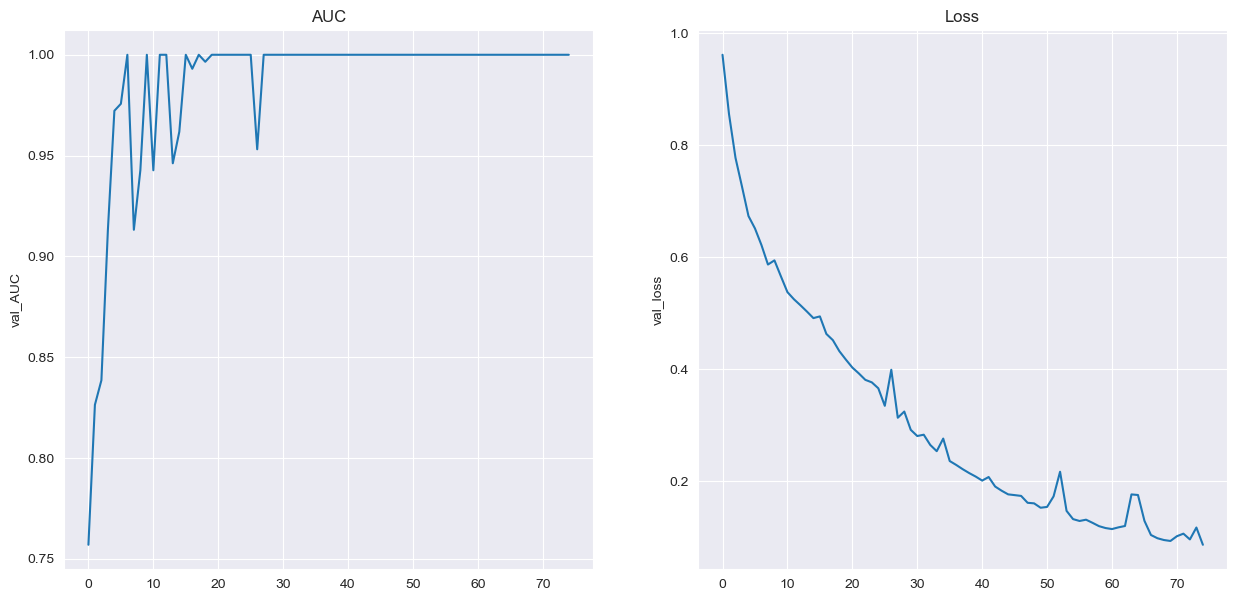

In [13]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=5)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.5262 - loss: 2.1060 - val_AUC: 0.8576 - val_loss: 0.8896
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7581 - loss: 0.9250 - val_AUC: 0.8333 - val_loss: 0.8209
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7266 - loss: 0.9166 - val_AUC: 0.9653 - val_loss: 0.7770
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8470 - loss: 0.8214 - val_AUC: 0.9792 - val_loss: 0.7252
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8778 - loss: 0.7763 - val_AUC: 0.8958 - val_loss: 0.6918
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9078 - loss: 0.6879 - val_AUC: 0.9306 - val_loss: 0.6418
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9341 - loss: 0.6224 - val_AUC: 1.0000 - val_loss: 0.5753
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9503 - loss: 0.6045 - val_AUC: 0.9045 - val_loss: 0.6619
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.954

,AUC,loss,val_AUC,val_loss
0,0.549468,1.557978,0.857639,0.889621
1,0.744106,0.930616,0.833333,0.820877
2,0.735061,0.910064,0.965278,0.777016
3,0.838863,0.821696,0.979167,0.725155
4,0.871978,0.763485,0.895833,0.691795
...,...,...,...,...
95,0.997214,0.121015,1.000000,0.048370
96,0.996228,0.129610,1.000000,0.047940
97,0.995820,0.122675,1.000000,0.048045
98,0.997364,0.117918,1.000000,0.053318


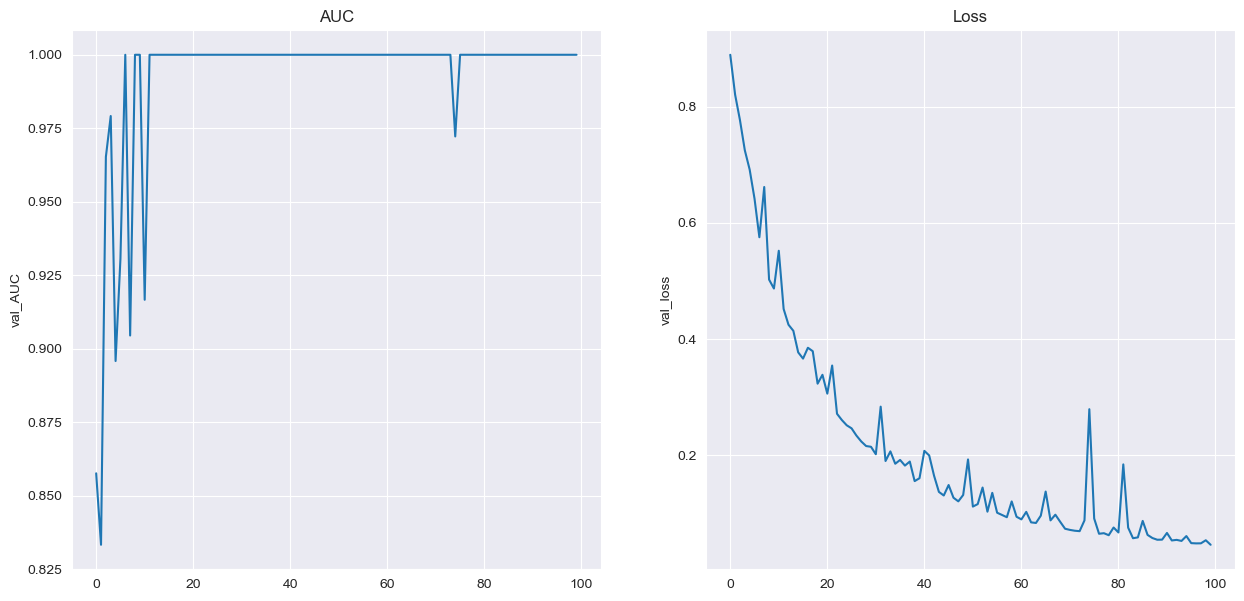

In [14]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=5, epochs=100)